In [42]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
from numpy.linalg import svd
import matplotlib.pyplot as plt

In [5]:
dataset = load_wine()

In [6]:
x = dataset.data
y = dataset.target

In [19]:
df_x = pd.DataFrame(x, columns=dataset.feature_names)
df_y= pd.DataFrame(y, columns=['Target'])

In [21]:
df_x.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177], dtype=int64

In [30]:
df=  df_x.merge(right=df_y,how='inner', left_index=True, right_index=True )

In [32]:
df_x.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
58,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [34]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


# PCA using np.linalg.svd

In [35]:
x_center = df_x - np.mean(df_x, axis=0)

In [36]:
u,s,v = svd(x_center)

In [89]:
v_trans = v.T[:,0:2]

In [90]:
x2d = x_center.dot(v_trans)

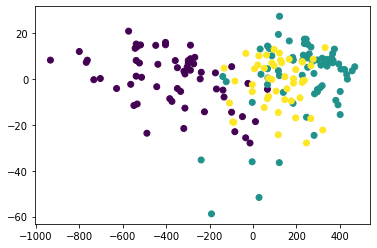

In [91]:
plt.scatter(x2d[0], x2d[1], c=df_y['Target'])

In [92]:
x2d_recovered = np.dot(x2d,v_trans.T)

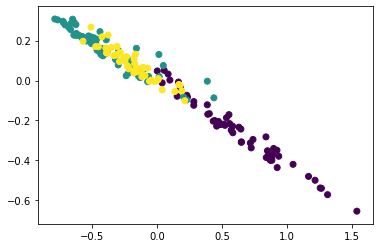

In [93]:
plt.scatter(x2d_recovered[:,0], x2d_recovered[:,1], c=df_y['Target'])

# PCA using sklearn

In [98]:
from sklearn.decomposition.pca import PCA

In [99]:
#find number of components to use
pca = PCA()
pca.fit(df_x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [100]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

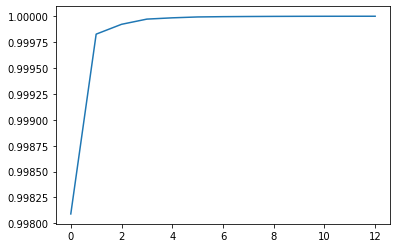

In [102]:
plt.plot(cumsum)

In [134]:
pca = PCA(n_components=np.argmax(cumsum>=0.9999))
x2d = pca.fit_transform(df_x)

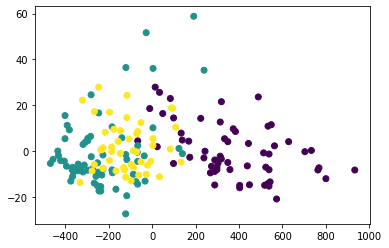

In [135]:
plt.scatter(x2d[:,0], x2d[:,1], c=df_y['Target'])

In [138]:
x2d_recovered = pca.inverse_transform(x2d)

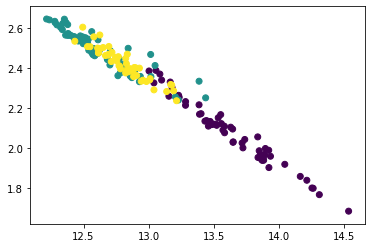

In [139]:
plt.scatter(x2d_recovered[:,0], x2d_recovered[:,1], c=df_y['Target'])

# Incremental PCA
## PCA applied on the partial dataset

In [145]:
from sklearn.decomposition import IncrementalPCA
n_batch = 10
ipca = IncrementalPCA(n_components=2, batch_size=n_batch)

In [146]:
for data in np.array_split(df_x,n_batch):
    ipca.partial_fit(data)

In [148]:
x2d =ipca.transform(df_x)

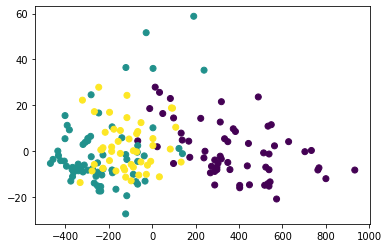

In [149]:
plt.scatter(x2d[:,0], x2d[:,1], c=df_y['Target'])

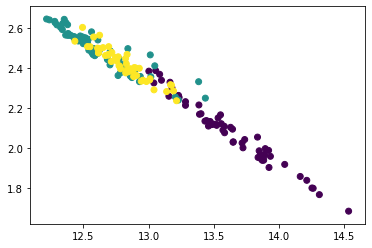

In [150]:
x_recovered = ipca.inverse_transform(x2d)
plt.scatter(x_recovered[:,0], x_recovered[:,1], c=df_y['Target'])

# Kernal PCA

In [166]:
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [219]:
clf = Pipeline([
    ('kpca',KernelPCA(n_components=2, fit_inverse_transform=True)),
    ('log_reg',KNeighborsClassifier())
])

In [220]:
param_grid=[{
    'kpca__gamma':np.linspace(0.03,0.5,10),
    'kpca__kernel':['rbf','sigmoid'],
}]

In [221]:
grid_search = GridSearchCV(clf,param_grid,cv=3)

In [222]:
grid_search.fit(df_x.values,np.squeeze(df_y.values))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=True,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                  

In [223]:
pre = grid_search.best_estimator_.predict(df_x.values)

In [224]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(np.squeeze(df_y.values),pre)

array([[49, 10,  0],
       [21, 43,  7],
       [ 9, 18, 21]], dtype=int64)

In [225]:
print(classification_report(np.squeeze(df_y.values),pre))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        59
           1       0.61      0.61      0.61        71
           2       0.75      0.44      0.55        48

    accuracy                           0.63       178
   macro avg       0.66      0.62      0.62       178
weighted avg       0.65      0.63      0.63       178



In [226]:
rbf_pca = grid_search.best_estimator_['kpca']

In [227]:
x2d = rbf_pca.fit_transform(df_x)

In [228]:
x_recovered = rbf_pca.inverse_transform(x2d)

In [229]:
from sklearn.metrics import mean_squared_error

In [235]:
mean_squared_error(x_recovered[:,:2],x2d)

86.25237477624853